# Hadamard Quantum Walks in the Galton Box

### Overview
Here, we implement a Hadamard-based quantum walk in the Galton board, replacing classical coin tosses with quantum superposition. The objective is to examine how interference patterns influence the output and compare it with the original Galton board distribution.

### Goals
- Construct a Hadamard quantum walk circuit adapted to a Galton box architecture.
- Study how the resulting quantum walk differs from standard binomial behavior.
- Plot and interpret the measurement histogram to reveal quantum features.


In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, circuit_drawer
import os

#Create output directory
output_dir = "../outputs/Derivable3b/"
os.makedirs(output_dir, exist_ok=True)  # Create if doesn't exist

# For Jupyter notebooks magic line command
%matplotlib inline

STEP 1: Create A Hadamard-based (unbiased) Quantum Walk using a Quantum Galton Box

In [8]:
def create_hadamard_galton_box(n_layers):
    """
    Construct a quantum Galton box circuit using Hadamard gates (unbiased).
    
    Parameters:
        layers (int): Number of Hadamard layers / depth.
    
    Returns:
        QuantumCircuit: The Hadamard-based Galton box circuit.
    """
    n_qubits = n_layers
    qc = QuantumCircuit(n_qubits, n_qubits)

    # Apply Hadamard gates to initialize equal superposition
    for i in range(n_qubits):
        qc.h(i)

    # Apply a cascade of CNOT gates to simulate branching
    for i in range(n_qubits - 1):
        qc.cx(i, i + 1)

    # Measure all qubits
    qc.barrier()
    qc.measure(range(n_layers), range(n_layers))
    return qc

STEP 2: Run the Quantum Circuit to Get the Result of Measurements

In [3]:
def simulate_distribution(qc, shots=2048):
    """
    Execute the circuit and gather measurement results.
    
    Parameters:
        qc (QuantumCircuit): The quantum circuit.
        shots (int): Number of measurement repetitions.
    
    Returns:
        dict: Raw bitstring counts.
    """
    simulator = AerSimulator()
    compiled = transpile(qc, simulator)
    result = simulator.run(compiled, shots=shots).result()
    counts = result.get_counts()
    return counts

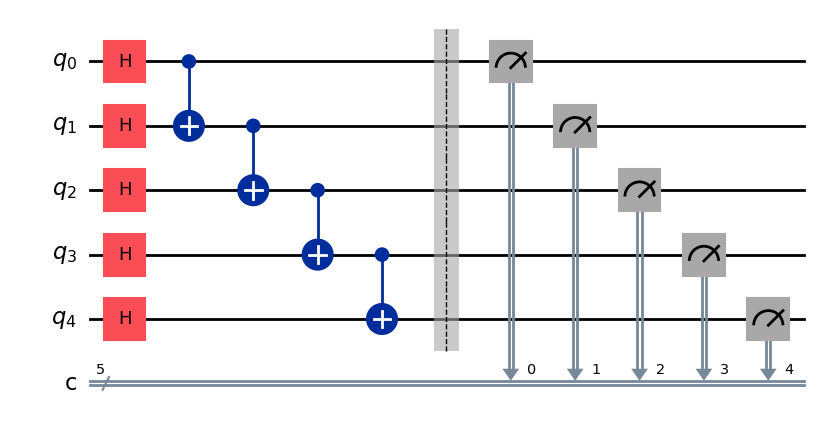

In [9]:
# Build the circuit
n_layers = 5
qc = create_hadamard_galton_box(n_layers=n_layers)

# Save circuit diagram
circuit_path = os.path.join(output_dir, "hadamard_quantum_walk_circuit.png")
circuit_drawer(qc, output='mpl', filename=circuit_path)

#Run the simulation
counts = simulate_distribution(qc)

STEP 3: Get the Output Histogram and Overlay it with Gaussian (normal) Function

In [5]:
# Function for quantum histogram
def plot_distribution(counts, title = "Hadamard Quantum Walk (Layers={n_layers})", save_path=None):
    """
    Plots the output histogram from the simulation.

    Parameters:
        counts (dict): Dictionary with bitstring frequencies.
        title (str): Title of the histogram plot.
    """
    plt.title()
    plt.show()

    # # Save and show
    # save_path = "/home/sarojray/Downloads/womanium2025/QuantumGaltonBox/results/Hadamard Quantum Walk.png"
    # plt.savefig(save_path, dpi=300)
    # plt.show()
    # print(f"[✓] Plot saved to: {save_path}")
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

# Function to overlay quantum histogram with Gaussian (normal) function
def plot_with_gaussian_overlay(counts, save_path=None):
    """
    Plot the quantum histogram with a Gaussian overlay.
    
    Parameters:
        counts (dict): Measurement bitstring results.
        title (str): Plot title.
        save_path (str): File name to save the figure.
    """
    # Convert binary strings to integer values
    int_counts = {int(k, 2): v for k, v in counts.items()}
    max_bin = max(int_counts.keys())
    bins = np.arange(max_bin + 1)

    # Normalize quantum measurement results
    total = sum(int_counts.values())
    measured_probs = np.array([int_counts.get(i, 0) / total for i in bins])

    # Gaussian curve using same mean and variance
    mean = np.sum(bins * measured_probs)
    variance = np.sum((bins - mean)**2 * measured_probs)
    std = np.sqrt(variance)
    gaussian = norm.pdf(bins, loc=mean, scale=std)
    gaussian /= np.sum(gaussian)  # Normalize

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.bar(bins, measured_probs, width=0.6, label="Quantum Simulation", alpha=0.6)
    plt.plot(bins, gaussian, 'g--o', label=f"Theoretical Gaussian (μ ≈ {mean:.2f}, σ ≈ {std:.2f})")
    plt.xlabel("Output (decimal value)")
    plt.ylabel("Probability")
    plt.title(f'Hadamard Quantum Walk (Gaussian Overlay, Layers={n_layers})')
    plt.legend()
    plt.grid(True)

    # # Save and show
    # save_path = "/home/sarojray/Downloads/womanium2025/QuantumGaltonBox/results/hadamard_gaussian_overlay_plot.png"
    # plt.savefig(save_path, dpi=300)
    # plt.show()
    # print(f"[✓] Plot saved to: {save_path}")
    if save_path:
        plt.savefig(save_path, dpi=300)
    plt.show()

[✓] Plot saved to: ../outputs/Derivable3b/hadamard_quantum_walk_plot.png


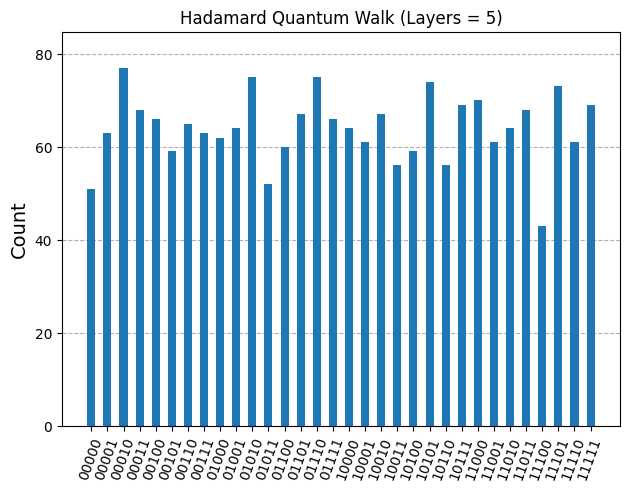

In [6]:
# Save and display quantum histogram
hist_path = os.path.join(output_dir, "hadamard_quantum_walk_plot.png")
# Plot histogram and get the matplotlib figure
fig = plot_histogram(counts, bar_labels=False)

# Set title using the figure's axis
ax = fig.gca()
ax.set_title("Hadamard Quantum Walk (Layers = 5)") 
# Save the figure
fig.savefig(hist_path)               
print(f"[✓] Plot saved to: {hist_path}")

[✓] Plot saved to: ../outputs/Derivable3b/hadamard_gaussian_overlay_plot.png


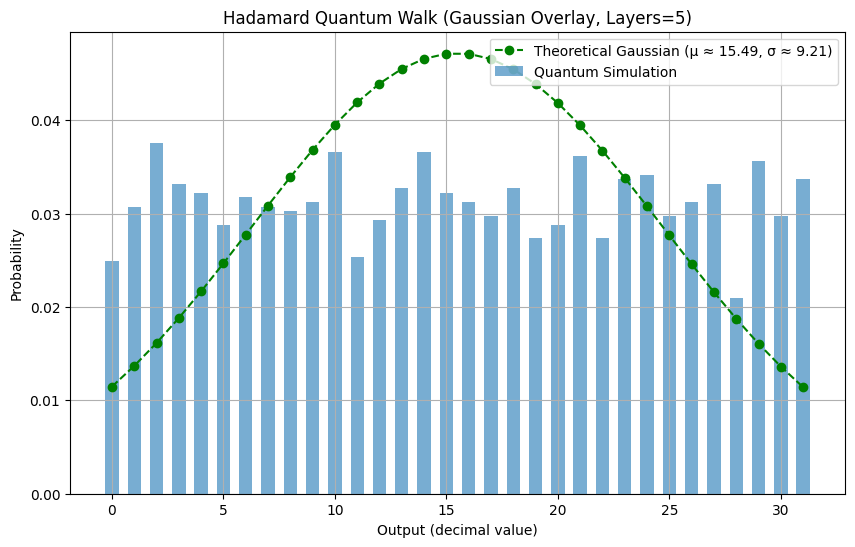

In [7]:
# Save and show the gaussian distribution overlay plot
plot_path = os.path.join(output_dir, "hadamard_gaussian_overlay_plot.png")
print(f"[✓] Plot saved to: {plot_path}")

# Exponential plot
plot_with_gaussian_overlay(counts, save_path=plot_path)